In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import random




In [5]:
dataset, info = tfds.load(
    "imdb_reviews/plain_text",
    split=["train[:80%]", "train[80%:]", "test"], # :80% not included 80%: including
    as_supervised=True,
    with_info=True
)

dataset_train_original = dataset [0]
dataset_validate_original = dataset[1]
dataset_test_origina = dataset [2]
info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteC69AFP/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteC69AFP/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteC69AFP/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

In [6]:
for x, y in dataset_train_original.take(8):
  print((x.numpy()).decode("utf-8"))
  print(y.numpy())
  print("")

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
0

I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was c

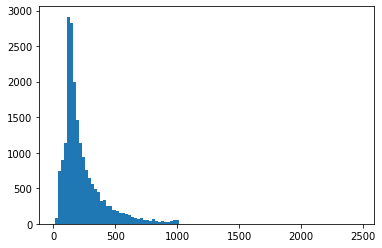

In [7]:
lengths = []
for review, _ in dataset_train_original:
    review = review.numpy().decode("utf-8")
    words = review.split()
    lengths += [len(words)]

plt.hist(lengths, bins=100)
plt.show()

In [8]:
print("Min   ", np.min(lengths))
print("Mean  ", np.mean(lengths))
print("STD   ", np.std(lengths))
print("Median", np.median(lengths))
print("Max   ", np.max(lengths))


Min    10
Mean   233.912
STD    173.81097104613391
Median 174.0
Max    2470


Bag of words encoding

In [9]:
vocabulary_size = 10_000

encoder = layers.TextVectorization(
    max_tokens=vocabulary_size,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="multi_hot"
)
encoder.adapt(
    dataset_train_original.map(lambda text, label: text).batch(2048)
)

In [12]:
vocabulary = encoder.get_vocabulary()
" ".join(vocabulary[:-100])

'[UNK] the and a of to is in it i this that br was as for with movie but film on not you his are have be he one its at all by an they who from so like her or just about if has out some there what good very when more she my even would up no which time only really story their had were see can me than we much well been get will also do into people other because bad first great how most him dont then made movies make could films way any them after too characters think watch two many being character never seen little plot love where acting best did life show know does ever your better still over these off end say while here scene man why such scenes go should through something im back those doesnt real watching thing years though now actors didnt another new nothing makes before actually work find old going look same funny few every us lot part director again quite cant thats cast pretty want young things seems got around take down world fact however between enough thought both own big give

In [15]:
text = "Hello my dear students! Its greate to be !"
print("Orginial", text)

text_encoded = encoder(text)
text_encoded = text_encoded.numpy()
text_encoded = [str(int(x)) for x in text_encoded]
text_encoded = "".join(text_encoded)

print(text_encoded)

Orginial Hello my dear students! Its greate to be !
100001000000000000000000001001000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [18]:
for x,y in dataset_train_original.take(8):
  x_encoded = encoder (x)
  print(x_encoded)
  print(y)
  

tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(10000,), dtype=float32)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(10000,), dtype=float32)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(10000,), dtype=float32)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(10000,), dtype=float32)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(10000,), dtype=float32)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(10000,), dtype=float32)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(10000,), dtype=float32)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(10000,), dtype=float32)
tf.Tensor(0, shape=(), dtype=int64)


In [24]:
dataset_train = dataset_train_original.cache()
dataset_train = dataset_train.shuffle(20_000)

dataset_train = dataset_train.batch(128)

dataset_validate = dataset_validate_original.cache()
dataset_validate = dataset_validate.batch(128)

for x, y in dataset_train.take(1):
  print(x.shape)
  print(y.shape)


(128,)
(128,)


In [31]:
model= models.Sequential()
model.add(encoder)
model.add(layers.Dense(64, activation="relu"))


model.summary()

#model.predict(["Hello world!"])


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 10000)            0         
 torization)                                                     
                                                                 
 dense_1 (Dense)             (None, 64)                640064    
                                                                 
Total params: 640,064
Trainable params: 640,064
Non-trainable params: 0
_________________________________________________________________
